# 06. jhanvi831/Software-Engineer-Salary-Prediction

## Predictions with ML Regression Models | Series 2 (T2) - survey_results_public.csv

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, QuantileRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names
df = pd.read_csv('06_survey_results_public.csv')

In [2]:
# First 5 rows of the dataset
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
# Last 5 rows of the dataset
df.tail()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


In [4]:
# All available columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

## Preprocessing

All preprocessing steps were carried out in almost exactly the same way as the author.

In [5]:
# Take only the meaningful columns:
# country, education level, years of coding as professional, employment type & converted comp. yearly
df_sub = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
# ConvertedCompYearly will be renamed to Salary
df_sub = df_sub.rename({"ConvertedCompYearly": "Salary"}, axis=1)
print("DATASET SHAPE:", df_sub.shape)
df_sub.head(10)

DATASET SHAPE: (83439, 5)


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN
5,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, part-time",NaN
6,United States of America,"Secondary school (e.g. American high school, G...",NaN,I prefer not to say,NaN
7,Malaysia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
8,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed part-time,NaN
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0


In [6]:
# Rows with null salaries will be removed
df_sub = df_sub[df_sub['Salary'].notnull()]
print("DATASET SHAPE AFTER REMOVAL OF NULL SALARIES:", df_sub.shape)
df_sub.head(10)

DATASET SHAPE AFTER REMOVAL OF NULL SALARIES: (46844, 5)


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0
18,Singapore,"Other doctoral degree (Ph.D., Ed.D., etc.)",30,I prefer not to say,160932.0
23,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,Employed full-time,38915.0
24,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18,Employed full-time,77831.0
26,Switzerland,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Employed full-time,81319.0


In [7]:
# Info about the current dataset
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [8]:
# Then, remove those rows containing null values. There should be no more...
df_sub = df_sub.dropna()
print("DATASET SHAPE AFTER REMOVAL OF ROWS WITH NULL:", df_sub.shape)
df_sub.isnull().sum()

DATASET SHAPE AFTER REMOVAL OF ROWS WITH NULL: (46359, 5)


Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
# Also, select such rows where person was employed as full time
df_sub = df_sub[df_sub["Employment"] == "Employed full-time"]
df_sub = df_sub.drop("Employment", axis=1)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [10]:
# Let's filter the countries such that their counts lower than the cutoff value are moved to 'Other'
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [11]:
# After that, we have these counts of countries as below
country_map = shorten_categories(df_sub['Country'].value_counts(), 400)
# print(country_map)
print("CURRENT DATASET SHAPE:", df_sub.shape)
df_sub['Country'] = df_sub['Country'].map(country_map)
df_sub['Country'].value_counts()

CURRENT DATASET SHAPE: (40211, 4)


Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

In [12]:
# It's better to remove the outliers once and for all!
df_sub = df_sub[df_sub["Salary"] <= 200000]
df_sub = df_sub[df_sub["Salary"] >= 10000]
df_sub = df_sub[df_sub['Country'] != 'Other']  # Even other countries are dropped as well

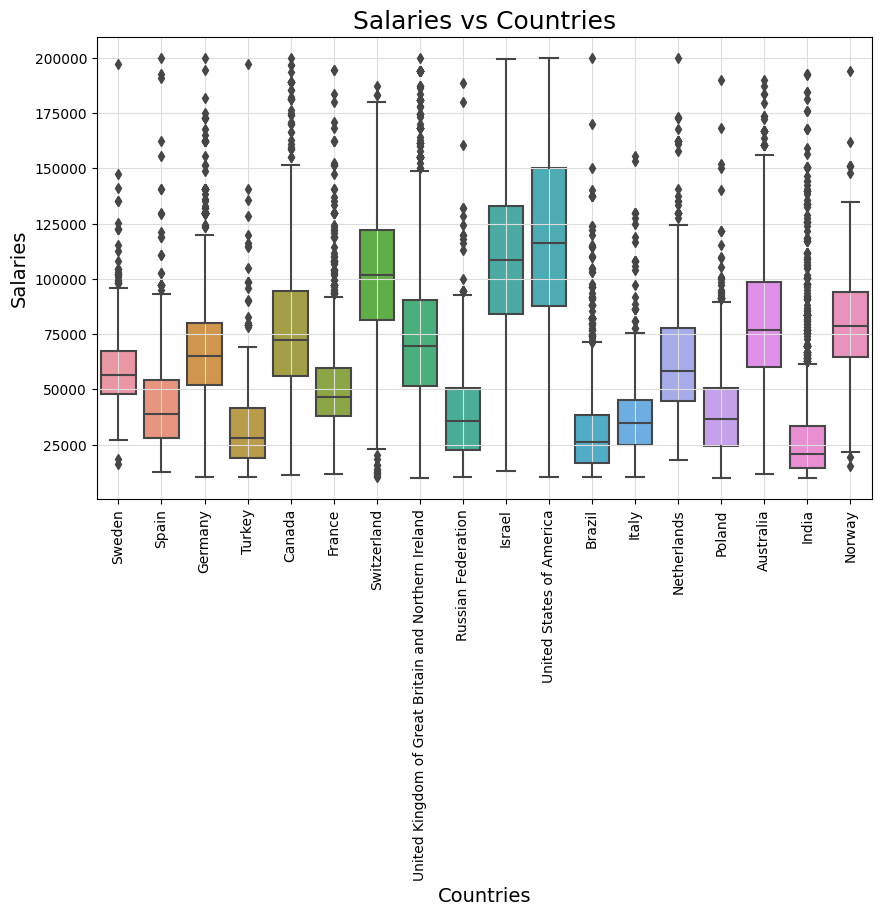

In [13]:
# Box plot visualization: Salaries vs Countries
plt.figure(figsize=(10,6))
sns.boxplot(data=df_sub, x='Country', y='Salary')
plt.title("Salaries vs Countries", fontsize=18)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Salaries', fontsize=14)
plt.xticks(rotation=90)
plt.grid(color='#dddddd')
plt.show()

In [14]:
print("CURRENT DATASET SHAPE:", df_sub.shape)

CURRENT DATASET SHAPE: (25580, 4)


In [15]:
# Let's check the unique values of 'years of coding as professional' column (note the data type: object)
df_sub["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '43', '40', '29', '38', '31', '42', '28', '46', '32',
       '36', '37', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [16]:
# It's better to convert the such texts into numbers, so it can be processed appropriately.
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
df_sub['YearsCodePro'] = df_sub['YearsCodePro'].apply(clean_experience)

In [17]:
df_sub["YearsCodePro"].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
       12. ,  8. , 17. ,  1. , 14. , 26. , 34. , 11. , 25. , 24. , 22. ,
       13. ,  9. ,  7. , 39. , 20. , 27. , 23. , 30. , 19. , 35. , 33. ,
       43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. , 37. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [18]:
# How about education levels?
df_sub["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [19]:
# Well, these need to be simplified, thus they can be handled easily
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor'
    if 'Master’s degree' in x:
        return 'Master'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'PostGrad'
    return 'LessThanBachelor'
df_sub['EdLevel'] = df_sub['EdLevel'].apply(clean_education)

In [20]:
df_sub["EdLevel"].unique()

array(['Master', 'Bachelor', 'PostGrad', 'LessThanBachelor'], dtype=object)

In [21]:
# Simplify the country names especially for USA and United Kingdom
def simplify_country_names(country):
    if country == 'United States of America':
        return 'USA'
    elif country == 'United Kingdom of Great Britain and Northern Ireland':
        return 'United Kingdom'
    else:
        return country
df_sub['Country'] = df_sub['Country'].apply(simplify_country_names)

In [22]:
df_sub['Country'].unique()

array(['Sweden', 'Spain', 'Germany', 'Turkey', 'Canada', 'France',
       'Switzerland', 'United Kingdom', 'Russian Federation', 'Israel',
       'USA', 'Brazil', 'Italy', 'Netherlands', 'Poland', 'Australia',
       'India', 'Norway'], dtype=object)

## Prepare Train and Test Sets

In [23]:
# Unlike what was done in 1st regression series, we'll create dummy variables for both education levels and countries
dummy_edu = pd.get_dummies(df_sub['EdLevel'])
dummy_country = pd.get_dummies(df_sub['Country'])
df_sub2 = pd.concat([dummy_edu, dummy_country, df_sub['YearsCodePro'], df_sub['Salary']], axis=1)
print("CURRENT DATASET SHAPE:", df_sub2.shape)
df_sub2.head(10)

CURRENT DATASET SHAPE: (25580, 24)


,Bachelor,LessThanBachelor,Master,PostGrad,Australia,Brazil,Canada,France,Germany,India,...,Poland,Russian Federation,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom,YearsCodePro,Salary
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4.0,51552.0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,5.0,46482.0
12,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6.0,77290.0
16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.0,17748.0
17,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.0,46135.0
23,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2.0,38915.0
24,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,18.0,77831.0
26,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,5.0,81319.0
27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,21.0,68507.0
29,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,16.0,37752.0


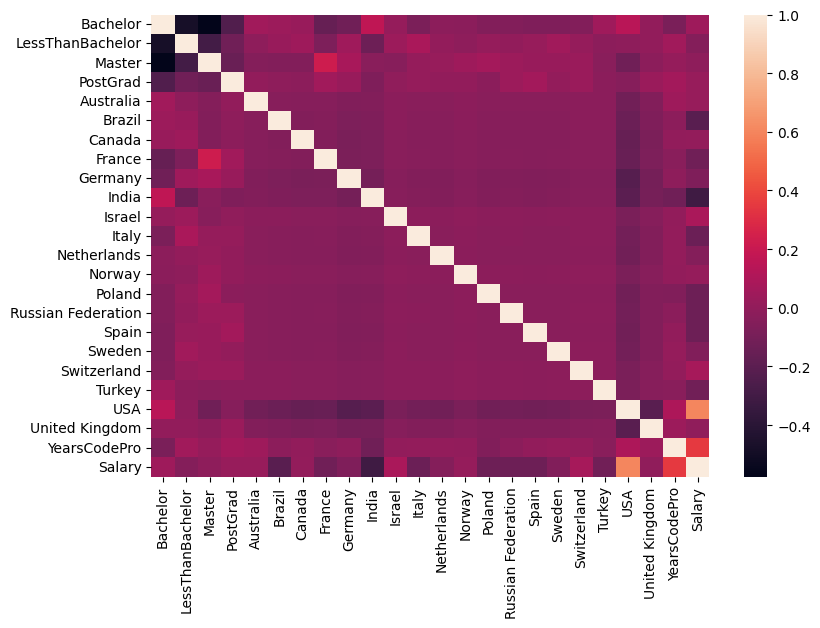

#### COLUMN CORRELATIONS AGAINST SALARIES ####
Bachelor              0.044882
LessThanBachelor     -0.051838
Master               -0.015085
PostGrad              0.021090
Australia             0.021316
Brazil               -0.208763
Canada                0.008739
France               -0.123342
Germany              -0.069303
India                -0.315436
Israel                0.086299
Italy                -0.140597
Netherlands          -0.049947
Norway                0.013708
Poland               -0.136783
Russian Federation   -0.135182
Spain                -0.133264
Sweden               -0.063445
Switzerland           0.073046
Turkey               -0.115985
USA                   0.605722
United Kingdom       -0.005894
YearsCodePro          0.352294
Salary                1.000000
Name: Salary, dtype: float64


In [24]:
# The correlations of all presented columns
plt.figure(figsize=(9,6))
sns.heatmap(df_sub2.corr())
plt.show()
print("#### COLUMN CORRELATIONS AGAINST SALARIES ####")
print(df_sub2.corr()['Salary'])

### Type 2: Use Positively Correlated Columns Only

In [25]:
# Use 80% of the dataset as training, and 20% as testing
# X = df_sub2.drop(columns='Salary', axis=1)
X = df_sub2[['Bachelor','PostGrad','Australia','Canada','Israel','Norway','Switzerland','USA','YearsCodePro']]
Y = df_sub2.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
print("TRAIN SIZE:", x_train.shape, y_train.shape, "  TEST SIZE:", x_test.shape, y_test.shape)
print(X.columns)

TRAIN SIZE: (20464, 9) (20464,)   TEST SIZE: (5116, 9) (5116,)
Index(['Bachelor', 'PostGrad', 'Australia', 'Canada', 'Israel', 'Norway',
       'Switzerland', 'USA', 'YearsCodePro'],
      dtype='object')


In [26]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression

In [27]:
linreg = LinearRegression()
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [28]:
# Fit the training data into the linear reg. model, then make predictions on the test data
s_time = time.time()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.017 seconds.


In [29]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [-1395.2407361   4687.61639205 26137.62471687 25245.68460478
 53692.62392131 29104.01116017 48243.49202898 63675.31902452
  1612.83606428]
RANK: 9
INTERCEPT: 37984.185539899874


In [30]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   74016.42197066495 |  69482.0
   54112.54618274802 | 108098.0
  113166.95234259419 | 189000.0
  108328.44414973975 | 115000.0
   75629.25803494976 |  47412.0
  122843.96872830308 | 200000.0
   70240.90682559616 |  84019.0
  106273.14325636123 |  80172.0
   38790.60357204228 |  37834.0
   49274.03798989358 |  43239.0
   65402.39863274172 | 148648.0
  105102.77202117012 | 150000.0
  125852.04552868864 | 183000.0
   47661.20192560876 |  64859.0
  46048.365861323946 |  70264.0
  132152.49798502465 | 150000.0
   120571.0725067405 |  66810.0
  47878.797253792836 |  45360.0
   98345.74904653721 |  84000.0
   44435.52979703913 |  38916.0


In [31]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1001937830.8503103
RMSE: 31653.40156839878
MAE: 24310.113574223768
R2 SCORE: 0.5086364818801239

# CROSS VALIDATION #
FITTING TIME: [0.01704812 0.01630569 0.00868225 0.00902677 0.00209093] -> 0.01063075065612793
SCORING TIME: [0.         0.0019989  0.00189853 0.00100064 0.        ] -> 0.0009796142578125
TRAIN SCORE: [0.52681092 0.5136779  0.5181554  0.508322   0.50983203] -> 0.5153596509285737
TEST SCORE: [0.46885223 0.51598155 0.4996785  0.52249496 0.53756827] -> 0.5089151032107704


## 2 - Lasso Regression

In [32]:
lasso = Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [33]:
# Fit the training data into the lasso model, then make predictions on the test data
s_time = time.time()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.014 seconds.


In [34]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_)  

COEF: [-1391.08634067  4669.8890746  26092.00627677 25216.30389841
 53618.82232418 29022.89408147 48170.42214127 63659.8875861
  1613.00557205]
INTERCEPT: 37992.80832269179
ITERATIONS: 7


In [35]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   73984.76726313436 |  69482.0
   54122.86404318647 | 108098.0
   113165.6541445181 | 189000.0
  108326.63742836972 | 115000.0
   75597.77283518383 |  47412.0
  122843.68757681493 | 200000.0
   70252.91976368116 |  84019.0
  106244.87870412372 |  80172.0
   38799.31110871652 |  37834.0
  49283.847327038064 |  43239.0
  65413.903047532745 | 148648.0
  105100.62628427078 | 150000.0
   125847.7794895384 | 183000.0
    47670.8417549886 |  64859.0
   46057.83618293913 |  70264.0
  132130.67413618948 | 150000.0
  120540.00962119349 |  66810.0
   47892.76098636405 |  45360.0
   98285.57216644633 |  84000.0
  44444.830610889665 |  38916.0


In [36]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1001943621.7253473
RMSE: 31653.493041453534
MAE: 24310.404504684888
R2 SCORE: 0.5086336419586801

# CROSS VALIDATION #
FITTING TIME: [0.01748514 0.01782274 0.01670432 0.01766777 0.01653934] -> 0.01724386215209961
SCORING TIME: [0.012465   0.         0.01201057 0.         0.        ] -> 0.00489511489868164
TRAIN SCORE: [0.52681075 0.51367774 0.51815524 0.50832183 0.50983187] -> 0.5153594843449409
TEST SCORE: [0.46885792 0.51597642 0.49967962 0.52248947 0.5375679 ] -> 0.5089142674325504


## 3 - Ridge Regression

In [37]:
ridge = Ridge()
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [38]:
# Fit the training data into the ridge model, then make predictions on the test data
s_time = time.time()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.008 seconds.


In [39]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [-1391.79337568  4683.63440374 26072.43168528 25202.13520984
 53508.10562328 28983.0639373  48072.95513251 63642.55335971
  1613.11451541]
INTERCEPT: 38001.86909187722
ITERATIONS: None


In [40]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   73974.30900935388 |  69482.0
   54133.01424598503 | 108098.0
  113157.54519918763 | 189000.0
  108318.20165295528 | 115000.0
   75587.42352476466 |  47412.0
  122836.23229165231 | 200000.0
   70264.15940009285 |  84019.0
  106236.59931756949 |  80172.0
   38808.42634958261 |  37834.0
  49293.670699752685 |  43239.0
   65424.81585386049 | 148648.0
  105091.97262213372 | 150000.0
  125841.14018274433 | 183000.0
  47680.556184341905 |  64859.0
  46067.441668931126 |  70264.0
   132137.8891018972 | 150000.0
  120533.30881653698 |  66810.0
   47901.87732407144 |  45360.0
   98183.75391652968 |  84000.0
  44454.327153520346 |  38916.0


In [41]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1001952633.1007707
RMSE: 31653.63538522504
MAE: 24310.901585733704
R2 SCORE: 0.5086292226613996

# CROSS VALIDATION #
FITTING TIME: [0.01387024 0.01161337 0.         0.01559281 0.0040319 ] -> 0.009021663665771484
SCORING TIME: [0.         0.00199318 0.         0.00171065 0.00196767] -> 0.0011343002319335938
TRAIN SCORE: [0.52681027 0.51367728 0.51815474 0.50832136 0.5098314 ] -> 0.515359009215878
TEST SCORE: [0.46886552 0.51596394 0.49967824 0.52248993 0.53757161] -> 0.5089138495014093


## 4 - Polynomial Regression

In [42]:
poly_feat = PolynomialFeatures(degree=2)
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [43]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(20464, 55) (5116, 55)


### Polynomial Regression with Lasso

In [44]:
lasso = Lasso()
s_time = time.time()
lasso.fit(x_poly_train, y_train)
y_poly_pred = lasso.predict(x_poly_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 4.528 seconds.


In [45]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_) 

COEF: [ 0.00000000e+00 -1.33841740e+03  8.47596270e+03  9.33187931e+03
  5.82650220e+03  2.59651486e+04  1.14727041e+04  2.15209040e+04
  5.93566992e+04  3.80741024e+03 -2.09514174e+03  0.00000000e+00
  6.21662888e+03  7.66861811e+03  1.05864397e+04  3.85417678e+03
  7.96932355e+03  3.87651118e+03  3.70347091e+01  6.93611115e-01
  3.25720348e+03  4.60254659e+03 -2.57322201e+01 -4.49760170e+03
 -1.78579866e+02  6.30978702e+03 -5.15527937e+02  9.79691326e+03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.13279398e+02  1.65082989e+04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.70606992e+01
  1.61308240e+04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.18075508e+02  2.07673587e+04  0.00000000e+00  0.00000000e+00
 -4.92006052e+02  1.88016448e+04  0.00000000e+00  5.58963764e+02
  1.28367219e-01  3.08269065e+02 -7.68117670e+01]
INTERCEPT: 29354.180807235804
ITERATIONS: 555


In [46]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)          
print("RMSE:", rmse)     
print("MAE:", mae)         
print("R2 SCORE:", r2)    
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 953260486.8797758
RMSE: 30874.91679146319
MAE: 23694.259110950497
R2 SCORE: 0.5325084929467134

# CROSS VALIDATION #
FITTING TIME: [0.01988173 0.01740479 0.00899863 0.01566792 0.01559615] -> 0.015509843826293945
SCORING TIME: [0.00200582 0.00187612 0.         0.01565075 0.        ] -> 0.003906536102294922
TRAIN SCORE: [0.52681075 0.51367774 0.51815524 0.50832183 0.50983187] -> 0.5153594843449409
TEST SCORE: [0.46885792 0.51597642 0.49967962 0.52248947 0.5375679 ] -> 0.5089142674325504


### Polynomial Regression with Ridge

In [47]:
ridge = Ridge()
s_time = time.time()
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.015 seconds.


In [48]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [    0.         -1731.42938121  4262.82051957  9521.57763722
 11150.58245423 21048.4230647  16131.54124025 20162.19227252
 29662.15914787  3807.44145631 -1731.42938121     0.
  6382.70328013  7757.55352545 10611.95733419  4015.20121488
  8111.12260676  3930.98587738    36.80911484  4262.82051966
  3821.29127272  4976.04631283 -1322.08430596 -5370.17557358
  -761.31373745  6361.81591555  -517.98584499  9521.57763727
     0.             0.             0.             0.
     0.           311.323579   11150.58245423     0.
     0.             0.             0.           -58.47757633
 21048.4230647      0.             0.             0.
   623.65094916 16131.54124031     0.             0.
  -493.6887238  20162.19227251     0.           561.68996164
 29662.15914782   308.63544634   -76.80714856]
INTERCEPT: 29363.587039961087
ITERATIONS: None


In [49]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 953258098.6952759
RMSE: 30874.87811628211
MAE: 23694.380380142913
R2 SCORE: 0.5325096641438691

# CROSS VALIDATION #
FITTING TIME: [0.         0.00525904 0.00665832 0.         0.00139332] -> 0.0026621341705322264
SCORING TIME: [0.01791406 0.00179124 0.         0.         0.        ] -> 0.003941059112548828
TRAIN SCORE: [0.52681027 0.51367728 0.51815474 0.50832136 0.5098314 ] -> 0.515359009215878
TEST SCORE: [0.46886552 0.51596394 0.49967824 0.52248993 0.53757161] -> 0.5089138495014093


## 5 - Decision Tree Regression

In [50]:
# dtree = DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=None, min_samples_split=2,
#                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=10,
#                              min_impurity_decrease=0.2, ccp_alpha=0.0)
dtree = DecisionTreeRegressor()
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [51]:
# Fit the training data into the decision tree, then make predictions on the test data
s_time = time.time()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.018 seconds.


In [52]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   81396.46666666666 |  69482.0
   61700.42388758782 | 108098.0
  125565.46242774566 | 189000.0
  108410.38888888889 | 115000.0
   81632.08695652174 |  47412.0
   131443.0985915493 | 200000.0
   72452.65882352942 |  84019.0
           122762.75 |  80172.0
   30148.90395480226 |  37834.0
    51984.5956284153 |  43239.0
   68686.91891891892 | 148648.0
   98282.39252336448 | 150000.0
    132797.898989899 | 183000.0
   53203.50847457627 |  64859.0
    47839.5861423221 |  70264.0
             71000.0 | 150000.0
   94424.33333333333 |  66810.0
   47834.71661237785 |  45360.0
            97793.25 |  84000.0
   44404.39186295503 |  38916.0


In [53]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(dtree, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 979156992.673031
RMSE: 31291.484347551028
MAE: 23937.353402098015
R2 SCORE: 0.5198085051812182

# CROSS VALIDATION #
FITTING TIME: [0.01724482 0.01559782 0.0187993  0.01418757 0.01198888] -> 0.015563678741455079
SCORING TIME: [0.00727677 0.         0.         0.00300241 0.        ] -> 0.002055835723876953
TRAIN SCORE: [0.57351078 0.56103033 0.56329334 0.55484125 0.55698279] -> 0.5619316984422154
TEST SCORE: [0.47884783 0.52388402 0.5169084  0.5361102  0.54741352] -> 0.5206327949942042


## 6 - Random Forest Regression

In [54]:
# rforest = RandomForestRegressor(n_estimators=100, criterion='friedman_mse', max_depth=20, min_samples_split=4, 
#                                 min_samples_leaf=4, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
#                                 bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None)
rforest = RandomForestRegressor()
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
# Fit the training data into the random forest, then make predictions on the test data
s_time = time.time()
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.859 seconds.


In [56]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   81751.90398862495 |  69482.0
   61530.03606697417 | 108098.0
  125529.90536777694 | 189000.0
  108051.12855260154 | 115000.0
   81012.32108615148 |  47412.0
  130877.71136841629 | 200000.0
   72573.00082687453 |  84019.0
  125938.76095815291 |  80172.0
   29894.53796571134 |  37834.0
   51973.98758314915 |  43239.0
   68448.56809585019 | 148648.0
   98378.06145053438 | 150000.0
  132724.38574564678 | 183000.0
   53194.32210472033 |  64859.0
   47760.90579644488 |  70264.0
  103127.69026829163 | 150000.0
   95335.85155555555 |  66810.0
   47769.26623378568 |  45360.0
   98875.31048085477 |  84000.0
   44401.64783619977 |  38916.0


In [57]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 965766340.092273
RMSE: 31076.781366355703
MAE: 23792.004198609215
R2 SCORE: 0.526375457700037

# CROSS VALIDATION #
FITTING TIME: [0.84936619 0.76388383 0.78308654 0.76494718 0.79650474] -> 0.7915576934814453
SCORING TIME: [0.05330563 0.05540633 0.05820036 0.06592464 0.05242872] -> 0.057053136825561526
TRAIN SCORE: [0.57287028 0.5601771  0.56243963 0.55400296 0.55623002] -> 0.5611439996642775
TEST SCORE: [0.48193878 0.52765746 0.52099628 0.54139092 0.55196152] -> 0.5247889940613175


## 7 - KNN Regression

In [58]:
knnreg = KNeighborsRegressor()
knnreg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
# Fit the training data into the KNN regression model, then make predictions on the test data
s_time = time.time()
knnreg.fit(x_train, y_train)
y_pred = knnreg.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.110 seconds.


In [60]:
# The distance metric to use. It will be the same as the 'metric' parameter or a synonym of it, e.g. 'euclidean' if the
# metric parameter set to 'minkowski' and 'p' parameter is set to 2.
print("EFFECTIVE METRIC:", knnreg.effective_metric_)
# Additional keyword arguments for the metric function. For most metrics will be same with 'metric_params' parameter,
# but may also contain the 'p' parameter value if the 'effective_metric_' attribute is set to 'miknowski'.
print("EFFECTIVE METRIC PARAMS:", knnreg.effective_metric_params_)
print("FEATURES:", knnreg.n_features_in_)  # Number of features seen during fit
print("FEATURE NAMES:", knnreg.feature_names_in_)  # Names of features seen during fit
print("SAMPLES FIT:", knnreg.n_samples_fit_)  # Number of samples in the fitted data

EFFECTIVE METRIC: euclidean
EFFECTIVE METRIC PARAMS: {}
FEATURES: 9
FEATURE NAMES: ['Bachelor' 'PostGrad' 'Australia' 'Canada' 'Israel' 'Norway'
 'Switzerland' 'USA' 'YearsCodePro']
SAMPLES FIT: 20464


In [61]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

             77699.6 |  69482.0
             54951.6 | 108098.0
            122800.0 | 189000.0
            114400.0 | 115000.0
             83512.2 |  47412.0
            125800.0 | 200000.0
             79164.2 |  84019.0
            118891.8 |  80172.0
             26754.2 |  37834.0
             29394.8 |  43239.0
             64161.8 | 148648.0
             67955.2 | 150000.0
            133161.4 | 183000.0
             61379.6 |  64859.0
             56932.8 |  70264.0
            108639.6 | 150000.0
             88003.0 |  66810.0
             48194.0 |  45360.0
             93859.2 |  84000.0
             42152.2 |  38916.0


In [62]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(knnreg, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1133092367.5142457
RMSE: 33661.43739524867
MAE: 25953.914620797503
R2 SCORE: 0.4443165684401038

# CROSS VALIDATION #
FITTING TIME: [0.0356493  0.03124642 0.03125215 0.07198358 0.03334856] -> 0.040696001052856444
SCORING TIME: [0.1005609  0.09574103 0.0900526  0.16380095 0.09363866] -> 0.10875883102416992
TRAIN SCORE: [0.46813928 0.45034603 0.46967531 0.46105239 0.45374446] -> 0.4605914964463286
TEST SCORE: [0.38106857 0.42547143 0.41637437 0.46007045 0.46013166] -> 0.4286232967988868


## 8 - Gradient Boosting

In [63]:
gradBoost = GradientBoostingRegressor()
gradBoost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [64]:
# Fit the training data into the Gradient boosting regression model, then make predictions on the test data
s_time = time.time()
gradBoost.fit(x_train, y_train)
y_pred = gradBoost.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.501 seconds.


In [65]:
print("INIT:", gradBoost.init_)  # The estimator that provides the initial predictions
print("ESTIMATORS (FIRST 5):\n{}".format(gradBoost.estimators_[:5]))  # The collection of fitted sub-estimators
# The number of estimators as selected by early stopping (if 'n_iter_no_change' is specified).
# Otherwise, it is set to 'n_estimators'
print("# OF ESTIMATORS:", gradBoost.n_estimators_)
print("# OF FEATURES:", gradBoost.n_features_in_)  # Number of features seen during fit
print("MAX FEATURES:", gradBoost.max_features_)  # The inferred value of max_features
print("FEATURE IMPORTANCES:", gradBoost.feature_importances_)  # The impurity-based feature importances
# The i'th score 'train_score[i]' is the loss of the model at iteration i on the in-bag sample.
# If subsample == 1, this is the loss on the training data.
print("TRAIN SCORE:\n{}".format(gradBoost.train_score_))

INIT: DummyRegressor()
ESTIMATORS (FIRST 5):
[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1EC1C2D5340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1EC1C2D5340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1EC1C2D5340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1EC1C2D5340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x1EC1C2D5340)]]
# OF ESTIMATORS: 100
# OF FEATURES: 9
MAX FEATURES: 9
FEATURE IMPORTANCES: [0.00165847 0.00216397 0.01427822 0.02497772 0.03585746 0.00854642
 0.02812517 0.67769947 0.20669309]
TRAIN SCORE:
[1.87020401e+09 1.71733006e+09 1.59231911e+09 1.48986948e+09
 1.

In [66]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

    76241.1298053897 |  69482.0
  59257.004775650275 | 108098.0
  125092.23141675624 | 189000.0
   108530.7858681184 | 115000.0
   76246.72597716589 |  47412.0
  131308.07644878363 | 200000.0
   72113.67891616166 |  84019.0
   104805.6645491392 |  80172.0
   31052.51429079539 |  37834.0
    51772.9697401747 |  43239.0
   70514.00856190441 | 148648.0
   98023.80633803888 | 150000.0
   132699.1474293453 | 183000.0
   51213.16384800705 |  64859.0
   47831.93618769909 |  70264.0
  137454.23166834223 | 150000.0
  100815.14899580005 |  66810.0
    49771.6446959471 |  45360.0
   97575.99846273498 |  84000.0
   43066.89930761799 |  38916.0


In [67]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(gradBoost, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 943469508.2877421
RMSE: 30715.948760989657
MAE: 23585.29622414962
R2 SCORE: 0.537310117896572

# CROSS VALIDATION #
FITTING TIME: [0.48398852 0.46346807 0.48473859 0.44511223 0.50296974] -> 0.4760554313659668
SCORING TIME: [0.00093746 0.00261116 0.         0.01506352 0.01559472] -> 0.0068413734436035155
TRAIN SCORE: [0.55890355 0.54617011 0.54845338 0.53983161 0.54246782] -> 0.5471652962516828
TEST SCORE: [0.4938561  0.54108553 0.53316375 0.55185655 0.56016302] -> 0.5360249902721602


## 9 - XGBoost

In [68]:
xgb = xgboost.XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [69]:
# Fit the training data into the extreme gradient boosting regression model, then make predictions on the test data
s_time = time.time()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.078 seconds.


In [70]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

       82985.7109375 |  69482.0
      61211.66015625 | 108098.0
      125885.5546875 | 189000.0
       108553.171875 | 115000.0
       80431.2578125 |  47412.0
       131282.359375 | 200000.0
       72217.4453125 |  84019.0
      119351.8515625 |  80172.0
     30164.404296875 |  37834.0
      52358.93359375 |  43239.0
       69704.1171875 | 148648.0
       98508.2734375 | 150000.0
        133317.84375 | 183000.0
       52611.9296875 |  64859.0
          48020.3125 |  70264.0
      108533.7734375 | 150000.0
         95543.34375 |  66810.0
       47382.5078125 |  45360.0
         97437.59375 |  84000.0
      44235.23046875 |  38916.0


In [71]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(xgb, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 970911106.8570473
RMSE: 31159.446510762147
MAE: 23835.800239139466
R2 SCORE: 0.5238523962688698

# CROSS VALIDATION #
FITTING TIME: [0.09649658 0.07855034 0.085922   0.07852554 0.07852745] -> 0.08360438346862793
SCORING TIME: [0.00499988 0.015625   0.01562428 0.         0.01562619] -> 0.010375070571899413
TRAIN SCORE: [0.57235472 0.56003084 0.56218578 0.55381528 0.55591299] -> 0.5608599215917593
TEST SCORE: [0.48279414 0.52973143 0.52193604 0.54060153 0.55288506] -> 0.5255896382087684


## Results of Metrics of All ML Models Together

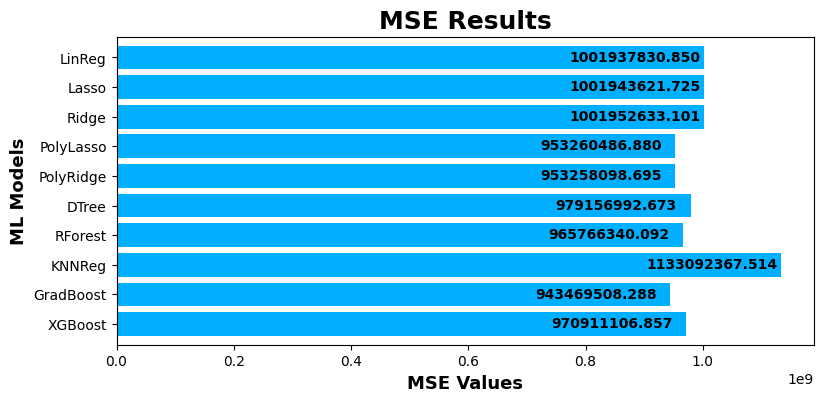

In [79]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyLasso', 'PolyRidge', 'DTree', 'RForest', 'KNNReg', 'GradBoost', 'XGBoost']
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mse[i]-230000000, i+0.12, "{:.3f}".format(res_mse[i]), fontweight='bold')
plt.show()

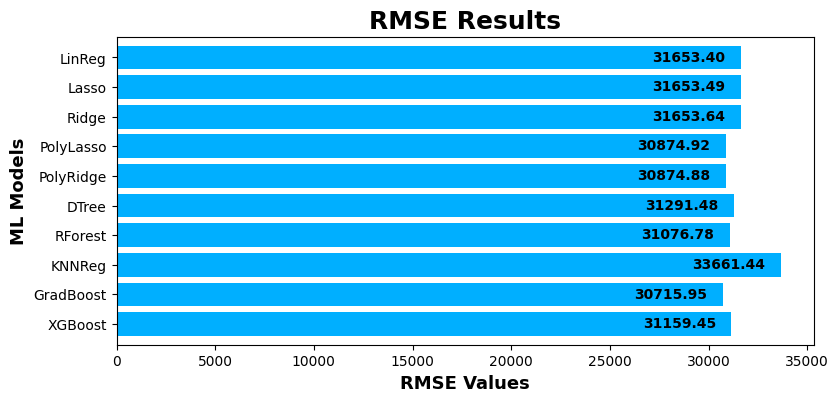

In [73]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_rmse[i]-4500, i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

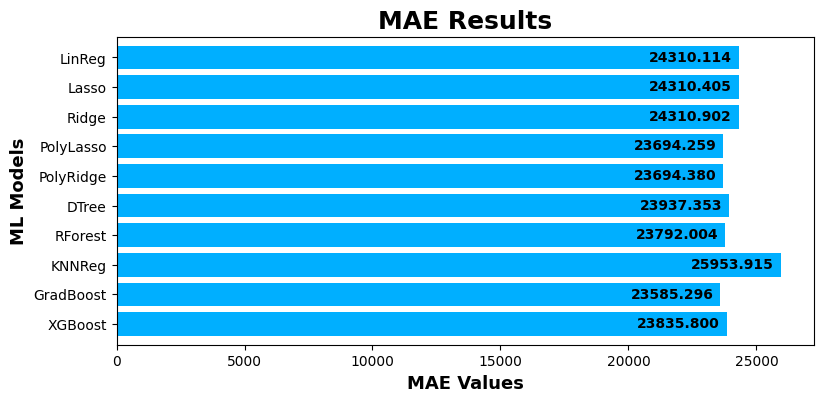

In [74]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mae[i]-3500, i+0.12, "{:.3f}".format(res_mae[i]), fontweight='bold')
plt.show()

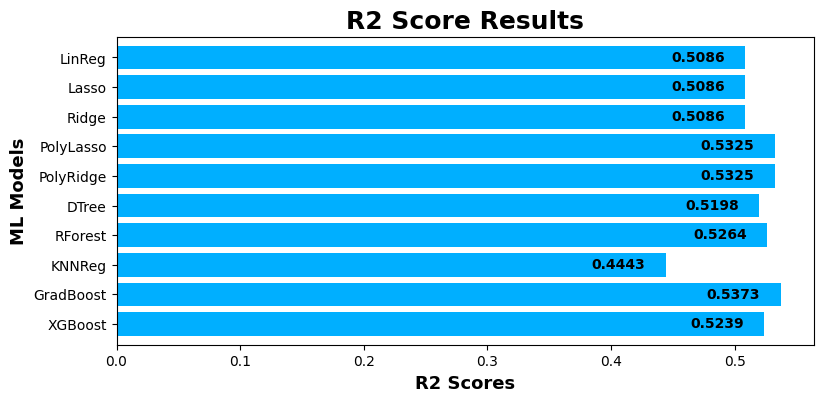

In [75]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_r2[i]-0.06, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()

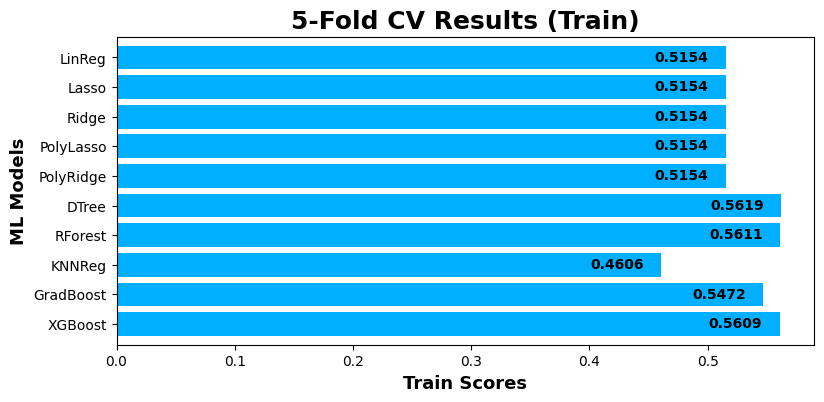

In [76]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_train, color='#00afff')
plt.title("5-Fold CV Results (Train)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Train Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_train[i]-0.06, i+0.12, "{:.4f}".format(res_cv_train[i]), fontweight='bold')
plt.show()

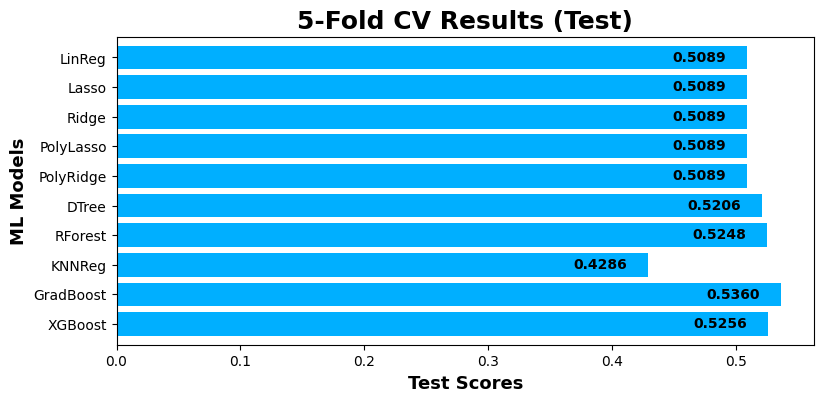

In [77]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_test, color='#00afff')
plt.title("5-Fold CV Results (Test)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Test Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_test[i]-0.06, i+0.12, "{:.4f}".format(res_cv_test[i]), fontweight='bold')
plt.show()